Librerías.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

DataFrames.

In [61]:
hechos=pd.read_csv('Hechos.csv')
poblacion=pd.read_csv('Poblacion.csv')
victimas=pd.read_csv('Victimas.csv')

Como el tercer KPI es solo en el horario nocturno, se realiza un filtro de las horas en la tabla hechos.

In [62]:
filtro = hechos[(hechos["HH"] <= 7.0) | (hechos["HH"] >= 22.0)]
filtro.head(3)

,Unnamed: 0,ID,N_VICTIMAS,AAAA,MM,HH,TIPO_DE_CALLE,COMUNA,VICTIMA,ACUSADO,SEMESTRE
0,0,2016-0001,1,2016,1,4.0,AVENIDA,8,MOTO,AUTO,2016-1
1,1,2016-0002,1,2016,1,1.0,GRAL PAZ,9,AUTO,PASAJEROS,2016-1
2,2,2016-0003,1,2016,1,7.0,AVENIDA,1,MOTO,AUTO,2016-1


Debido a que en el DataFrame 'hechos' no necesariamente son todos mortales, se lo une con el DataFrame 'victimas' para obtener solo los casos en donde haya fallecido 1 o mas personas.

In [63]:
df=pd.merge(filtro, victimas, left_on='ID', right_on='ID_hecho', how='inner')
df = pd.merge(df, poblacion, on='AAAA', how='inner')
df.head()

,Unnamed: 0_x,ID,N_VICTIMAS,AAAA,MM,HH,TIPO_DE_CALLE,COMUNA,VICTIMA,ACUSADO,SEMESTRE,Unnamed: 0_y,ID_hecho,SEXO,EDAD,Unnamed: 0,POBLACION_ANUAL
0,0,2016-0001,1,2016,1,4.0,AVENIDA,8,MOTO,AUTO,2016-1,0,2016-0001,MASCULINO,19,1,3059122.0
1,1,2016-0002,1,2016,1,1.0,GRAL PAZ,9,AUTO,PASAJEROS,2016-1,1,2016-0002,MASCULINO,70,1,3059122.0
2,2,2016-0003,1,2016,1,7.0,AVENIDA,1,MOTO,AUTO,2016-1,2,2016-0003,MASCULINO,30,1,3059122.0
3,4,2016-0005,1,2016,1,5.0,AVENIDA,1,MOTO,PASAJEROS,2016-1,4,2016-0005,MASCULINO,29,1,3059122.0
4,8,2016-0012,1,2016,2,1.0,AVENIDA,1,MOTO,CARGAS,2016-1,8,2016-0012,MASCULINO,22,1,3059122.0


Se visualiza la composicion del df.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0_x     273 non-null    int64  
 1   ID               273 non-null    object 
 2   N_VICTIMAS       273 non-null    int64  
 3   AAAA             273 non-null    int64  
 4   MM               273 non-null    int64  
 5   HH               273 non-null    float64
 6   TIPO_DE_CALLE    273 non-null    object 
 7   COMUNA           273 non-null    int64  
 8   VICTIMA          273 non-null    object 
 9   ACUSADO          273 non-null    object 
 10  SEMESTRE         273 non-null    object 
 11  Unnamed: 0_y     273 non-null    int64  
 12  ID_hecho         273 non-null    object 
 13  SEXO             273 non-null    object 
 14  EDAD             273 non-null    object 
 15  Unnamed: 0       273 non-null    int64  
 16  POBLACION_ANUAL  273 non-null    float64
dtypes: float64(2), i

Se eliminan las columnas innecesarias para el calculo deñ KPI 3.

In [65]:
col_eliminar=['Unnamed: 0_x','ID','HH','TIPO_DE_CALLE','COMUNA','VICTIMA','ACUSADO','Unnamed: 0_y','SEXO','EDAD','Unnamed: 0','ID_hecho','MM','SEMESTRE','POBLACION_ANUAL']
df.drop(columns=col_eliminar, axis=1,inplace=True)
df.head(3)

,N_VICTIMAS,AAAA
0,1,2016
1,1,2016
2,1,2016


Se crea un nuevo DataFrame agrupado por años, ya que el KPI 3 es anual. Este contiene los datos de cantidad de victimas del año actual.

In [66]:
df_actual = filtro.groupby("AAAA")["N_VICTIMAS"].count().reset_index()
df_actual

,AAAA,N_VICTIMAS
0,2016,64
1,2017,53
2,2018,56
3,2019,37
4,2020,37
5,2021,40


Se crea una nueva columna'AAAA_ANTERIOR' ya que la vamos a necesitar, como llave, para posteriormente unirla con otro df.

In [67]:
df_actual['AAAA_ANTERIOR'] = df_actual['AAAA']-1
df_actual

,AAAA,N_VICTIMAS,AAAA_ANTERIOR
0,2016,64,2015
1,2017,53,2016
2,2018,56,2017
3,2019,37,2018
4,2020,37,2019
5,2021,40,2020


Se define otro DataFrame con los datos de cantidad de víctimas, pero del año anterior al que estamos viendo. Es por esto que la agrupación es, de igual manera que antes, por año.

In [68]:
df_anterior = filtro.groupby("AAAA")["N_VICTIMAS"].count().reset_index()
df_anterior = df_anterior.rename(columns={"N_VICTIMAS": "N_VICTIMAS_ANTERIOR",
                                          "AAAA": "AAAA_ANTERIOR"})
df_anterior

,AAAA_ANTERIOR,N_VICTIMAS_ANTERIOR
0,2016,64
1,2017,53
2,2018,56
3,2019,37
4,2020,37
5,2021,40


Por último, se unen los dos df creados anteriormente para ya tener todos los datos necesarios para nuestro KPI 3. Se unen mediante la columna 'AAAA_ANTERIOR' que se, también, creó anteriormente.

In [69]:
# unir df actual y df anterior
df_KPI_3 = pd.merge(df_actual, df_anterior, on="AAAA_ANTERIOR", how="inner")
df_KPI_3

,AAAA,N_VICTIMAS,AAAA_ANTERIOR,N_VICTIMAS_ANTERIOR
0,2017,53,2016,64
1,2018,56,2017,53
2,2019,37,2018,56
3,2020,37,2019,37
4,2021,40,2020,37


Como se sabe la fórmula de la métrica para medir el KPI 3, se lo calcula

In [70]:
anterior = df_KPI_3["N_VICTIMAS_ANTERIOR"]
actual = df_KPI_3["N_VICTIMAS"]
df_KPI_3["KPI_3"] = (((anterior - actual) / anterior) * 100).round(2)
df_KPI_3

,AAAA,N_VICTIMAS,AAAA_ANTERIOR,N_VICTIMAS_ANTERIOR,KPI_3
0,2017,53,2016,64,17.19
1,2018,56,2017,53,-5.66
2,2019,37,2018,56,33.93
3,2020,37,2019,37,0.00
4,2021,40,2020,37,-8.11


En la tabla, un KPI 3 positivo significa que  la cantidad deaccidentes nocturnos disminuyó de un año a otro. Caso contrraio es cuando el KPI 3 es negativo. A mayor módulo, más abrupto el cambio.

Se grafica el valor del KPI 3 en función del año, para visualizar mas facilmente el comportamiento.

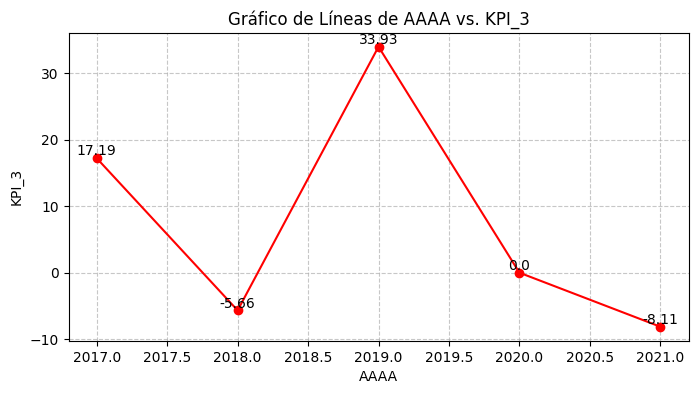

In [71]:
anio = df_KPI_3["AAAA"]
KPI = df_KPI_3["KPI_3"]
# Crear el gráfico de líneas
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(anio, KPI, marker='o', linestyle='-', color="red")
plt.title('Gráfico de Líneas de AAAA vs. KPI_3')
plt.xlabel('AAAA')
plt.ylabel('KPI_3')
# Agregar etiquetas de datos (valores) sobre cada punto
for i, valor in enumerate(KPI):
    plt.text(anio[i], valor, str(valor), ha='center', va='bottom')
# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Analizando el gráfico, vemos que los cambios son mus pronunciados. Una pendiente negativa significa que la cantidad de accidentes nocturnos aumentó. Una pendiente porsitiva, significa que la cantidad de accidentes nocturnos disminuyó. Exceptto en el 2020 que quedó igual respecto del año anteriror, eso significa el valo 0.

Se guarda el df del KPI 3 en formato CSV.

In [72]:
df_KPI_3.to_csv('KPI_3.csv')